# **BANK CUSTOMER CHURN ANALYSIS**

This dataset from XYZ Multistate Bank includes various columns that highlight key aspects of customer behavior and attributes. Each column offers valuable insights into the factors contributing to customer churn, helping to identify patterns among those who are most likely to leave the bank. Our analysis will focus on uncovering these trends to enhance predictive accuracy.

**I. Preproceesing**

1. Loading data

In [1]:
import gdown

file_id = "1wbWevIhUf60dzw9YEzoazZdbZs_TriPl"
file_path = f"https://drive.google.com/uc?id={file_id}"
gdown.download(file_path, "BankData.csv", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1wbWevIhUf60dzw9YEzoazZdbZs_TriPl
To: /content/BankData.csv
100%|██████████| 837k/837k [00:00<00:00, 27.7MB/s]


'BankData.csv'

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv("BankData.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15598695,Fields,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15671610,Hooper,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


2. Checking data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

The dataset contains 10,000 rows, and none of the rows have null values.

In [4]:
unique_count = df["CustomerId"].nunique()
total_count = len(df)

print(f"Number of unique values of customer ID: {unique_count}")
print(f"Number of rows: {total_count}")


Number of unique values of customer ID: 10000
Number of rows: 10000


There is no duplicated customer ID.

**II. Explorary Data Analysis**


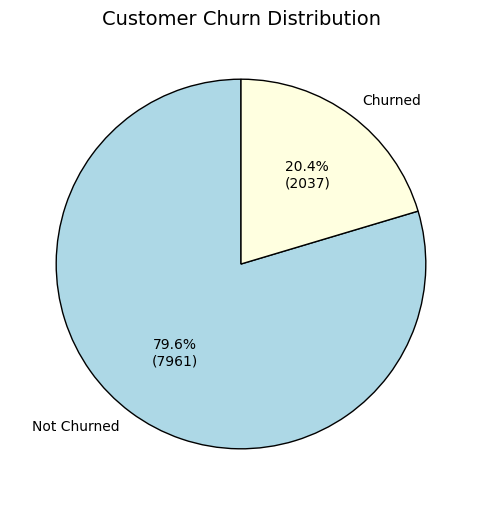

In [5]:
exited_counts = df["Exited"].value_counts()
labels = ["Not Churned", "Churned"]
colors = ["lightblue", "lightyellow"]

plt.figure(figsize=(6, 6))
plt.pie(
    exited_counts, labels=labels, colors=colors,
    autopct=lambda p: f"{p:.1f}%\n({int(p*sum(exited_counts)/100)})",
    startangle=90, wedgeprops={"edgecolor": "black"}
)

plt.title("Customer Churn Distribution", fontsize=14)
plt.show()

Out of the total customer base, 20.4% have churned, which corresponds to 2,037 individuals. This indicates a significant portion of customers discontinuing their engagement, highlighting the need for further analysis to identify potential causes and mitigation strategies.

1. Demographic factors

We will analyze customers' age, gender, and geography to determine whether demographics influence churn.

It includes customers' age, country and gender.

    a. AGE

<Axes: >

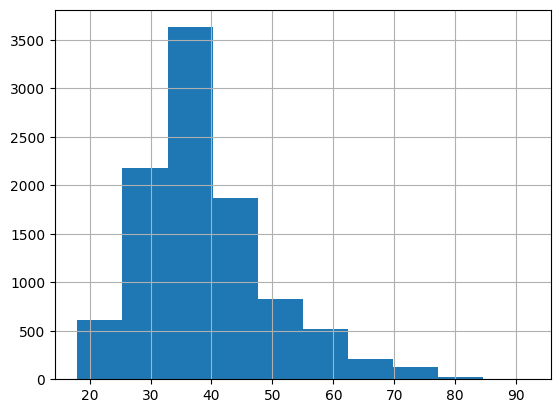

In [6]:
df['Age'].hist()

Ages range from under 20 to over 80, so we will group them as follows:

- Under 20

- 20–29

- 30–39

- 40–49

- 50–59

- 60–69

- 70 and above

/tmp/ipython-input-3867056625.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby('age_group')['Exited'].mean().sort_index() * 100


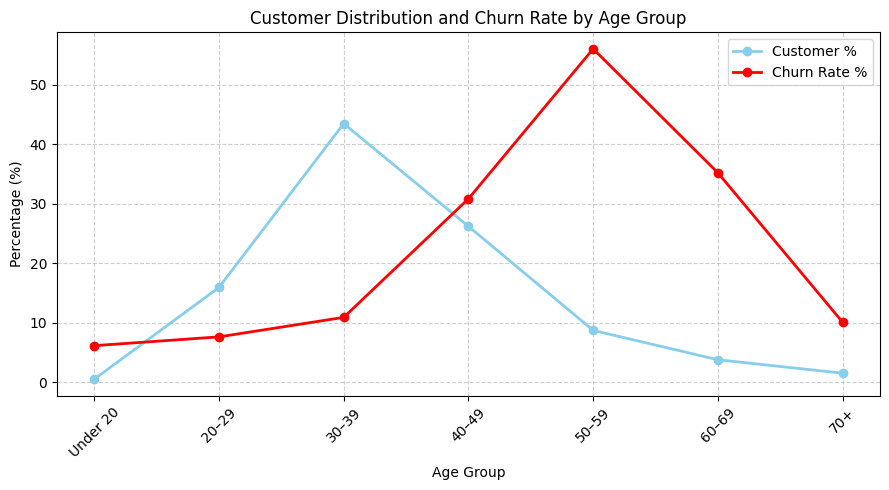

In [9]:
bins = [0, 19, 29, 39, 49, 59, 69, 90]
labels = ['Under 20', '20–29', '30–39', '40–49', '50–59', '60–69', '70+']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

customer_pct = df['age_group'].value_counts(normalize=True).sort_index() * 100
churn_rate = df.groupby('age_group')['Exited'].mean().sort_index() * 100

plt.figure(figsize=(9, 5))
plt.plot(customer_pct.index, customer_pct.values, marker='o', linewidth=2, label='Customer %', color='skyblue')
plt.plot(churn_rate.index, churn_rate.values, marker='o', linewidth=2, label='Churn Rate %', color='red')

plt.title('Customer Distribution and Churn Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


1️⃣ **Age 40–49 signals highest churn concern** → Although this group accounts for nearly **30% of total customers**, those aged 40–49 show a **churn rate** also close to **30%**, making it the most alarming segment. Additionally, 50–59 and 60–69 groups exhibit above-average churn, suggesting the bank is **struggling to retain older customer segments**.

2️⃣ **Customers aged 30–39 are core and stable** → The 30–39 age group forms the largest customer base (around 45%), while also maintaining a low and stable churn rate.

    b. Gender

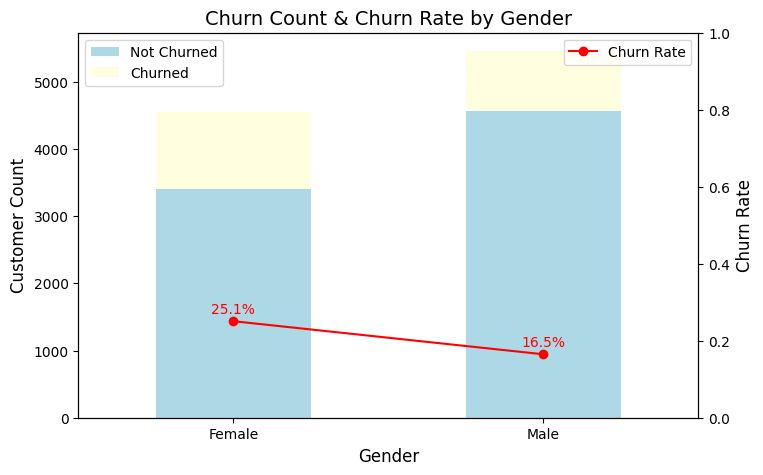

In [ ]:
gender_counts = df.groupby(["Gender", "Exited"])["CustomerId"].count().unstack()

churn_rate = gender_counts[1] / (gender_counts[0] + gender_counts[1])

fig, ax1 = plt.subplots(figsize=(8, 5))

gender_counts.plot(kind="bar", stacked=True, color=["lightblue", "lightyellow"], ax=ax1)
ax1.set_ylabel("Customer Count", fontsize=12)
ax1.set_xlabel("Gender", fontsize=12)
ax1.set_title("Churn Count & Churn Rate by Gender", fontsize=14)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax2 = ax1.twinx()
ax2.plot(churn_rate.index, churn_rate, marker="o", linestyle="-", color="red", label="Churn Rate")
ax2.set_ylabel("Churn Rate", fontsize=12)
ax2.set_ylim(0, 1)

for i, rate in enumerate(churn_rate):
    ax2.text(i, rate + 0.02, f"{rate:.1%}", ha="center", color="red", fontsize=10)

ax1.legend(["Not Churned", "Churned"], loc="upper left")
ax2.legend(loc="upper right")

plt.show()


1️⃣ **Female customers have a higher churn rate**: The churn rate for female customers is **25.1%**, while for male customers, it is **16.5%**. This suggests that female customers are more likely to leave compared to their male counterparts.  

2️⃣ **Male customers are more likely to stay**: The majority of male customers remain with the company, as shown by their lower churn rate. This could be due to differences in customer behavior, needs, or satisfaction levels.  

3️⃣ **Gender may influence customer retention**: The difference of **8.6%** indicates that gender might play a role in customer retention. Understanding why female customers churn at a higher rate could help refine retention strategies.

    c. Geography

In [ ]:
geography_counts = df["Geography"].value_counts()
print(geography_counts)

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


We operate in three main regions: France, Germany, and Spain. Among them, **France is our largest market**, with over 5,000 customers, accounting for more than **50%** of our total customer base.

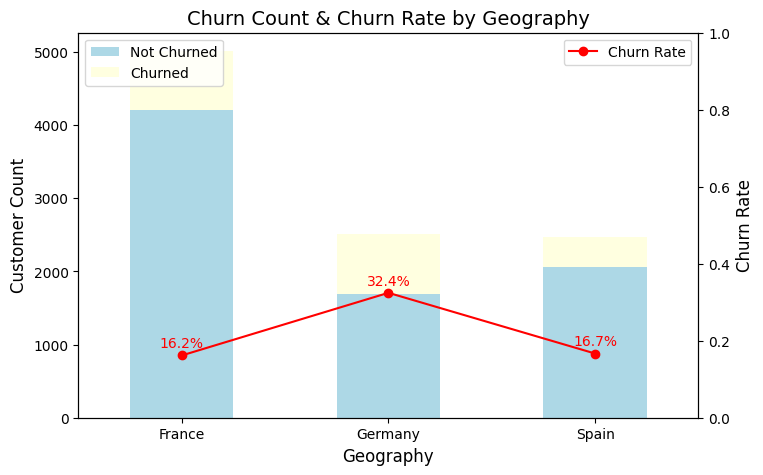

In [ ]:
geography_counts = df.groupby(["Geography", "Exited"])["CustomerId"].count().unstack()

churn_rate = geography_counts[1] / (geography_counts[0] + geography_counts[1])

fig, ax1 = plt.subplots(figsize=(8, 5))

geography_counts.plot(kind="bar", stacked=True, color=["lightblue", "lightyellow"], ax=ax1)
ax1.set_ylabel("Customer Count", fontsize=12)
ax1.set_xlabel("Geography", fontsize=12)
ax1.set_title("Churn Count & Churn Rate by Geography", fontsize=14)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

ax2 = ax1.twinx()
ax2.plot(churn_rate.index, churn_rate, marker="o", linestyle="-", color="red", label="Churn Rate")
ax2.set_ylabel("Churn Rate", fontsize=12)
ax2.set_ylim(0, 1)

for i, rate in enumerate(churn_rate):
    ax2.text(i, rate + 0.02, f"{rate:.1%}", ha="center", color="red", fontsize=10)

ax1.legend(["Not Churned", "Churned"], loc="upper left")
ax2.legend(loc="upper right")

plt.show()


1️⃣ Germany has the **highest churn rate (~32.4%)**: With a churn rate nearly twice as high as France and Spain, Germany stands out as **a potential area of concern**. This is an alert that we need to figure out what happened in Germany if we want to maintain our business there.

2️⃣ France has the largest customer base but the **lowest churn rate (~16.2%)**: Despite having **the most customers**, France retains them well. This could indicate **stronger customer loyalty**, better banking services, or more favorable conditions compared to other regions.

3️⃣ Spain has a moderate customer base and a churn rate similar to France (~16.7%): The churn rate in Spain is almost identical to France, but with a smaller customer base. This suggests that while churn isn't a major issue in Spain, it should still be monitored to maintain stability.

2. Financial factors

This includes customers' card types, account balances, estimated salaries, and credit card ownership.

    a. Card type

In [ ]:
print(df['Card Type'].value_counts())

Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64


There are four card types—Diamond, Gold, Silver, and Platinum—each with a nearly equal share of customers, around 25% of the total.

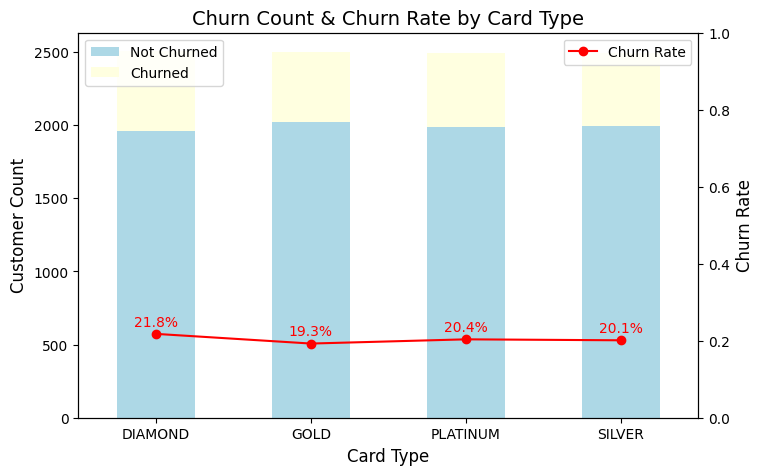

In [ ]:
card_counts = df.groupby(["Card Type", "Exited"])["CustomerId"].count().unstack()
churn_rate = card_counts[1] / (card_counts[0] + card_counts[1])
fig, ax1 = plt.subplots(figsize=(8, 5))

card_counts.plot(kind="bar", stacked=True, color=["lightblue", "lightyellow"], ax=ax1)
ax1.set_ylabel("Customer Count", fontsize=12)
ax1.set_xlabel("Card Type", fontsize=12)
ax1.set_title("Churn Count & Churn Rate by Card Type", fontsize=14)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax2 = ax1.twinx()
ax2.plot(churn_rate.index, churn_rate, marker="o", linestyle="-", color="red", label="Churn Rate")
ax2.set_ylabel("Churn Rate", fontsize=12)
ax2.set_ylim(0, 1)

for i, rate in enumerate(churn_rate):
    ax2.text(i, rate + 0.02, f"{rate:.1%}", ha="center", color="red", fontsize=10)

ax1.legend(["Not Churned", "Churned"], loc="upper left")
ax2.legend(loc="upper right")

plt.show()


The churn rate across all card types is relatively similar, ranging from **19.3% to 21.8%**, suggesting that **card type is not a major factor influencing customer churn.**

    b. Balance

<Axes: >

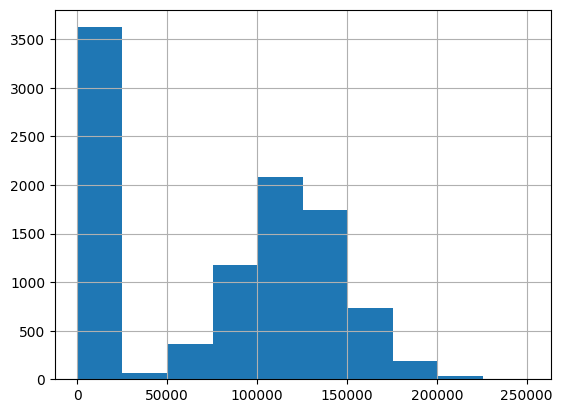

In [ ]:
df['Balance'].hist()

Balance range from 0 to over 250000, so we will group them as follows:

- 0

- 0 - 50000

- 50000 - 100000

- 100000 - 150000

- 150000 - 200000

- 200000 above

/tmp/ipython-input-3415945380.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby('balance_group')['Exited'].mean().sort_index() * 100


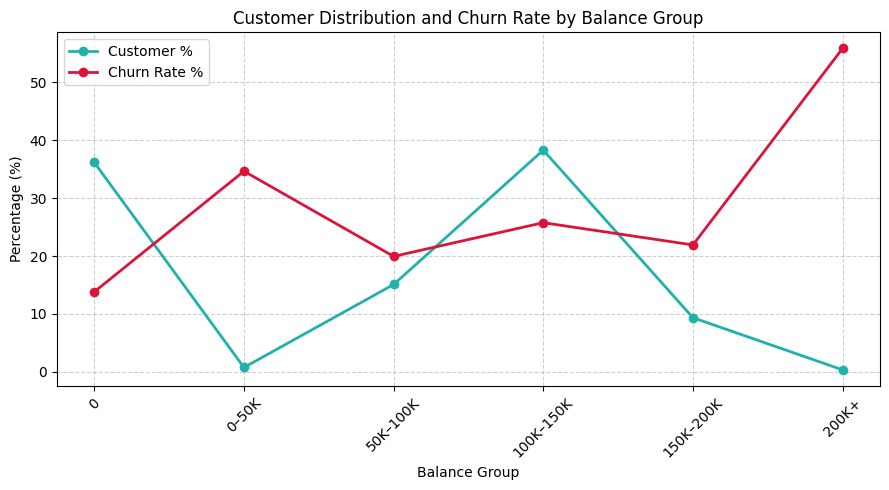

In [10]:
bins = [-1, 0, 50000, 100000, 150000, 200000, float('inf')]
labels = ['0', '0–50K', '50K–100K', '100K–150K', '150K–200K', '200K+']
df['balance_group'] = pd.cut(df['Balance'], bins=bins, labels=labels)

customer_pct = df['balance_group'].value_counts(normalize=True).sort_index() * 100

churn_rate = df.groupby('balance_group')['Exited'].mean().sort_index() * 100

plt.figure(figsize=(9, 5))
plt.plot(customer_pct.index, customer_pct.values, marker='o', linewidth=2, label='Customer %', color='lightseagreen')
plt.plot(churn_rate.index, churn_rate.values, marker='o', linewidth=2, label='Churn Rate %', color='crimson')

plt.title('Customer Distribution and Churn Rate by Balance Group')
plt.xlabel('Balance Group')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


1️⃣ **High-value accounts (200K+) face serious churn risk** → Customers with balances over 200K represent a very small portion of the base, yet experience the **highest churn rate** (~55%). This indicates a significant retention challenge among premium customers and suggests the need for specialized engagement or wealth management strategies.

2️⃣ **Zero balance customers are loyal but numerous** → Customers with zero balance make up 35% of the customer base, and their churn rate is relatively low (~14%), indicating low-risk but potentially low-value. This segment could be stable, but may also reflect underutilized accounts that need activation or upsell initiatives.

3️⃣ **100K–150K is a large but at-risk segment** → With a churn rate of ~26%, which is above the average, it represents **a hidden retention risk**. Strategic efforts to understand pain points and prevent silent attrition in this group could deliver high-impact gains.

→ **Balance is a strong but non-linear churn predictor**: Churn does not decrease steadily with higher balances — instead, both ends (very low and very high balances) carry higher churn risk. This calls for targeted retention strategies for these extremes.

    c. Estimated Salary

<Axes: >

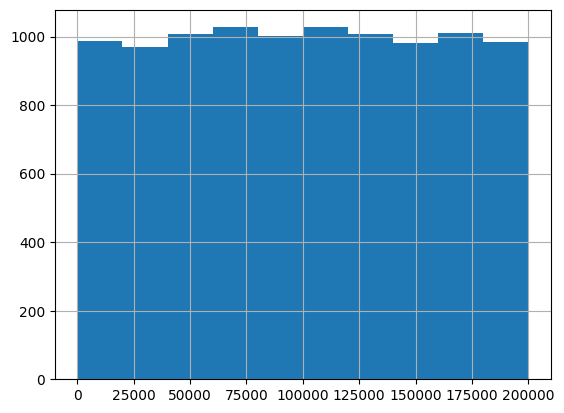

In [14]:
df['EstimatedSalary'].hist()

<Axes: >

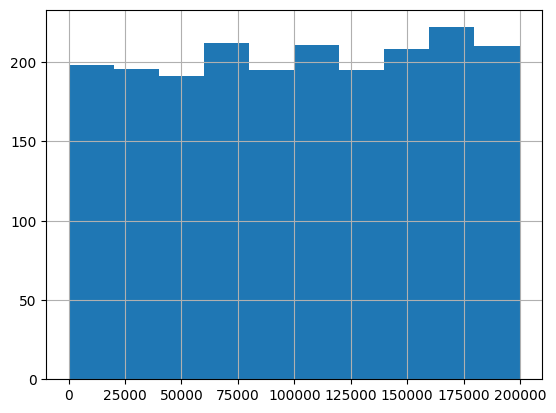

In [16]:
df[df['Exited'] == 1]['EstimatedSalary'].hist()


1️⃣ **Estimated Salary doesn’t have a clear impact on churn**: The distributions for churned and all customers are quite similar, indicating that salary is not a strong predictor of whether a customer will leave. Customers, whether they churned or not, have a wide range of estimated salaries, meaning that people with both high and low salaries exhibit similar churn behavior.

→ Since balance appeared to have an impact on churn while salary did not, it could be useful to **analyze how balance and salary together influence churn**.

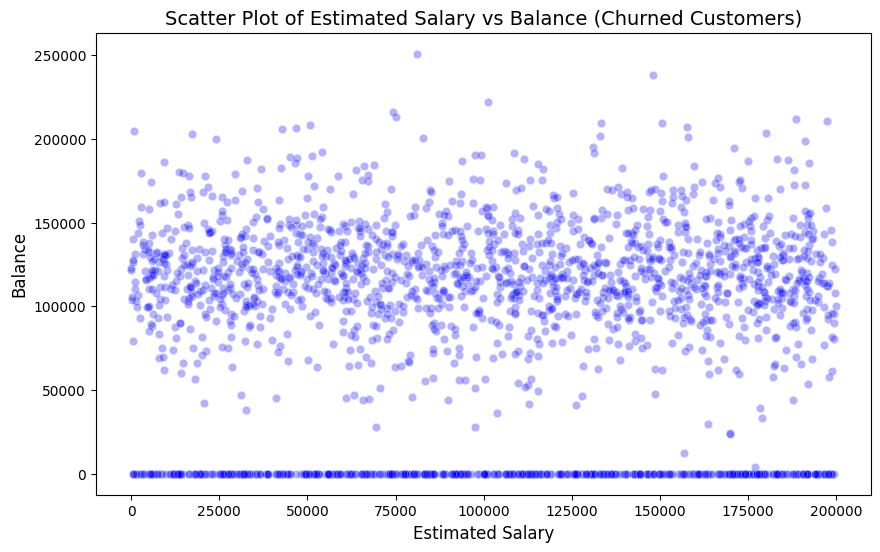

In [ ]:
plt.figure(figsize=(10, 6))

df_churned = df[df["Exited"] == 1]

sns.scatterplot(x=df_churned["EstimatedSalary"], y=df_churned["Balance"], color="blue", alpha=0.3)

plt.xlabel("Estimated Salary", fontsize=12)
plt.ylabel("Balance", fontsize=12)
plt.title("Scatter Plot of Estimated Salary vs Balance (Churned Customers)", fontsize=14)

plt.show()


1️⃣ **Churn is evenly distributed across Estimated Salary**: This indicates that salary does not provide significant insight into predicting customer churn. Therefore, salary alone may **not be a reliable factor** for assessing churn risk.

2️⃣ **Churn is most concentrated among customers with a balance of 0, but balance = 0 does not lie within the IQR range on the box plot**: This suggests that while customers with a balance of 0 show higher churn rates, balance itself might not be the primary factor driving churn. We will do further analysis to determine whether balance = 0 truly influences churn, as it falls outside the typical range on the box plot.

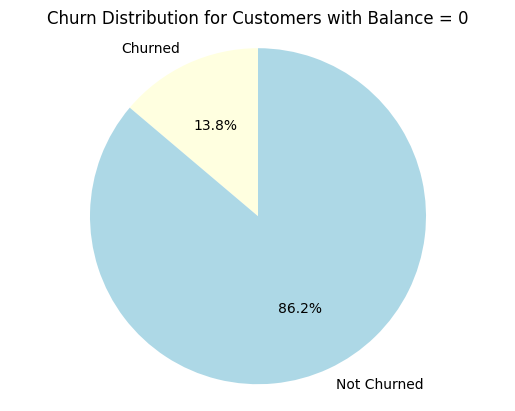

In [ ]:
zero_balance_customers = df[df['Balance'] == 0]

churned = zero_balance_customers['Exited'].sum()
not_churned = len(zero_balance_customers) - churned

labels = ['Churned', 'Not Churned']
sizes = [churned, not_churned]
colors = ['lightyellow', 'lightblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution for Customers with Balance = 0')
plt.axis('equal')
plt.show()

The churn rate for customers with a balance of 0 is 13.8%, which is **lower than the overall churn rate** of 20.4%. The dark scatter plot is due to the high number of customers with a balance of 0, but **it does not indicate that customers with a balance of 0 are more likely to leave**. In fact, they tend to stay longer, with their churn rate being much lower overall at 6.6%.

    d. Credit Card Ownership




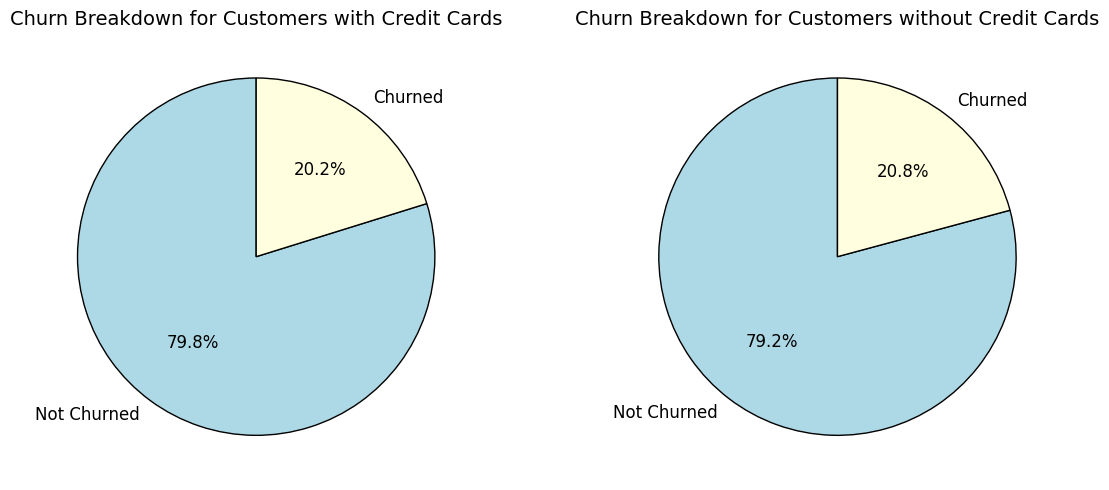

In [ ]:
credit_card_churn_counts = df[df["HasCrCard"] == 1]["Exited"].value_counts().sort_index()
no_credit_card_churn_counts = df[df["HasCrCard"] == 0]["Exited"].value_counts().sort_index()

labels = ["Not Churned", "Churned"]
colors = ["lightblue", "lightyellow"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Pie chart 1: Churn breakdown for Customers with Credit Cards
wedges1, texts1, autotexts1 = axes[0].pie(
    credit_card_churn_counts, labels=labels, autopct="%1.1f%%", colors=colors,
    startangle=90, wedgeprops={"edgecolor": "black"}, textprops={"fontsize": 12}
)
axes[0].set_title("Churn Breakdown for Customers with Credit Cards", fontsize=14)

# Pie chart 2: Churn breakdown for Customers without Credit Cards
wedges2, texts2, autotexts2 = axes[1].pie(
    no_credit_card_churn_counts, labels=labels, autopct="%1.1f%%", colors=colors,
    startangle=90, wedgeprops={"edgecolor": "black"}, textprops={"fontsize": 12}
)
axes[1].set_title("Churn Breakdown for Customers without Credit Cards", fontsize=14)

plt.tight_layout()
plt.show()


The churn rates for customers with and without credit cards are quite similar (20.2% vs. 20.8%), indicating that owning a credit card has **no significant impact on customer churn**.

3. Customer Experience and Engagement Duration Factors

This includes customer tenure, number of products owned, active membership status, history of complaints, satisfaction score, and points earned.

    a. Tenure

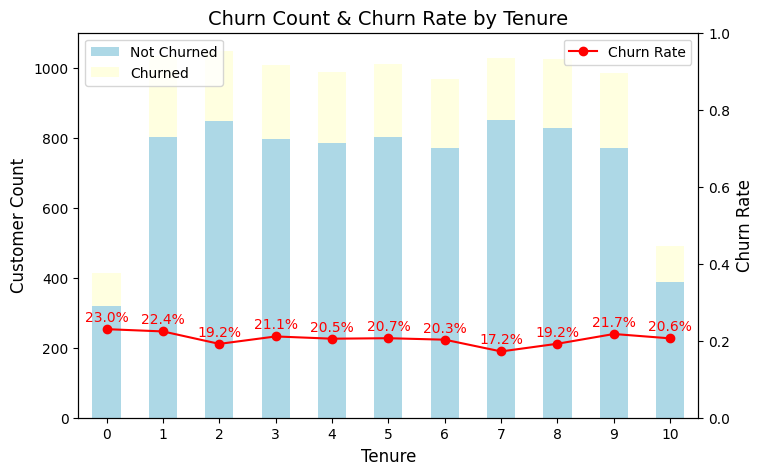

In [ ]:
tenure_counts = df.groupby(["Tenure", "Exited"])["CustomerId"].count().unstack()
churn_rate = tenure_counts[1] / (tenure_counts[0] + tenure_counts[1])
fig, ax1 = plt.subplots(figsize=(8, 5))

tenure_counts.plot(kind="bar", stacked=True, color=["lightblue", "lightyellow"], ax=ax1)
ax1.set_ylabel("Customer Count", fontsize=12)
ax1.set_xlabel("Tenure", fontsize=12)
ax1.set_title("Churn Count & Churn Rate by Tenure", fontsize=14)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

ax2 = ax1.twinx()
ax2.plot(churn_rate.index, churn_rate, marker="o", linestyle="-", color="red", label="Churn Rate")
ax2.set_ylabel("Churn Rate", fontsize=12)
ax2.set_ylim(0, 1)

for i, rate in enumerate(churn_rate):
    ax2.text(i, rate + 0.02, f"{rate:.1%}", ha="center", color="red", fontsize=10)

ax1.legend(["Not Churned", "Churned"], loc="upper left")
ax2.legend(loc="upper right")

plt.show()

1️⃣ **The highest churn rates are observed in tenure 1 and 2**: This indicates that the bank is **struggling to retain newly acquired customers** (those who have been with the bank for only 1 or 2 years). While the churn rate is still within an acceptable range, it serves as an important alert.  

2️⃣ **The churn rate is relatively consistent between long-term and new customers**: This suggests that the bank **lacks targeted retention strategies for its long-standing clients**. The churn rate for customers from year 7 to year 10 ranges from 17.2% to 21.7%, which is notably high considering these are long-term customers.

    b. Number of products

In [ ]:
print(df['NumOfProducts']. value_counts())

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64


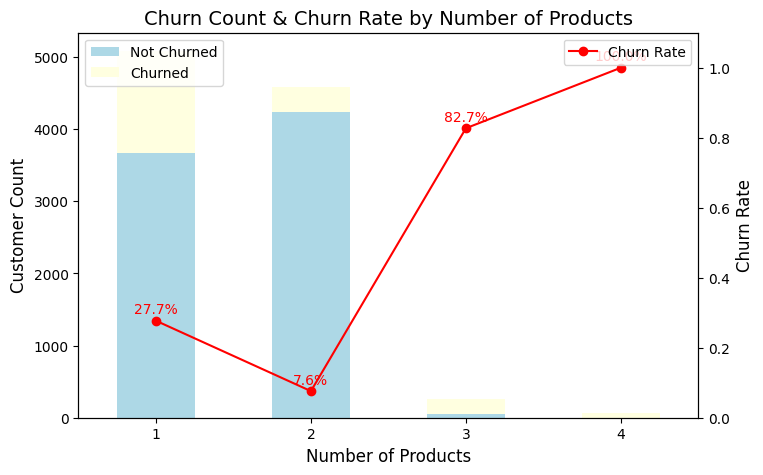

In [ ]:
product_counts = df.groupby(["NumOfProducts", "Exited"])["CustomerId"].count().unstack().fillna(0)
churn_rate = product_counts[1] / (product_counts[0] + product_counts[1])
fig, ax1 = plt.subplots(figsize=(8, 5))

product_counts.plot(kind="bar", stacked=True, color=["lightblue", "lightyellow"], ax=ax1)
ax1.set_ylabel("Customer Count", fontsize=12)
ax1.set_xlabel("Number of Products", fontsize=12)
ax1.set_title("Churn Count & Churn Rate by Number of Products", fontsize=14)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

ax2 = ax1.twinx()
ax2.plot(churn_rate.index-1, churn_rate, marker="o", linestyle="-", color="red", label="Churn Rate")
ax2.set_ylabel("Churn Rate", fontsize=12)
ax2.set_ylim(0, 1.1)

for i, rate in enumerate(churn_rate):
    ax2.text(churn_rate.index[i]-1, rate + 0.02, f"{rate:.1%}", ha="center", color="red", fontsize=10)

ax1.legend(["Not Churned", "Churned"], loc="upper left")
ax2.legend(loc="upper right")

plt.show()

1️⃣ **High churn among multi-service customers**: Customers using multiple services have extremely high churn rates (82.7% for those with 3 services and 100% for those with 4). Although they represent only 3.3% of the total customer base, this trend suggests that **these customers may be more experimental**, trying out multiple services rather than committing to long-term usage. It’s important to investigate whether their needs aren’t being met or if there are specific issues pushing them away.  

2️⃣ **Stable segment with 2 services**: Customers using 2 services have the lowest churn rate (7.6%) while making up the second-largest group (45.9%). This indicates that two-product users are **the most stable customer segment.**

3️⃣ **Largest group but with notable churn risk**: The majority of customers (50.8%) use only 1 service, but they have a relatively high churn rate (27.7%). To improve retention, it’s crucial to analyze which service is most commonly used in this group and identify ways to enhance their experience, making them more engaged and less likely to leave.

    c. Active Member

In [ ]:
print(df['IsActiveMember'].value_counts())

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64


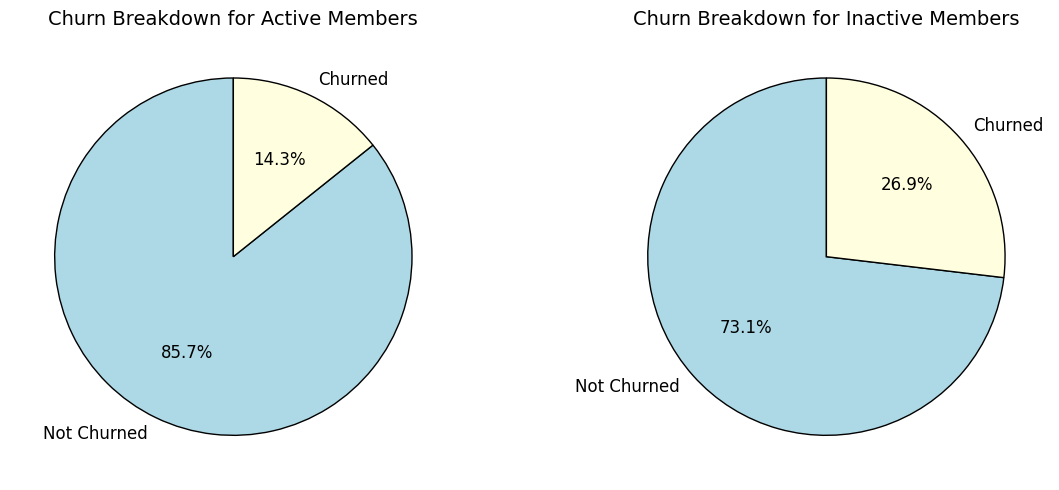

In [ ]:
active_churn_counts = df[df["IsActiveMember"] == 1]["Exited"].value_counts().sort_index()
inactive_churn_counts = df[df["IsActiveMember"] == 0]["Exited"].value_counts().sort_index()

labels = ["Not Churned", "Churned"]
colors = ["lightblue", "lightyellow"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Pie chart 1: Churn breakdown for Active Members
wedges1, texts1, autotexts1 = axes[0].pie(
    active_churn_counts, labels=labels, autopct="%1.1f%%", colors=colors,
    startangle=90, wedgeprops={"edgecolor": "black"}, textprops={"fontsize": 12}
)
axes[0].set_title("Churn Breakdown for Active Members", fontsize=14)

# Pie chart 2: Churn breakdown for Inactive Members
wedges2, texts2, autotexts2 = axes[1].pie(
    inactive_churn_counts, labels=labels, autopct="%1.1f%%", colors=colors,
    startangle=90, wedgeprops={"edgecolor": "black"}, textprops={"fontsize": 12}
)
axes[1].set_title("Churn Breakdown for Inactive Members", fontsize=14)

plt.tight_layout()
plt.show()


1️⃣ **Inactive Members have a significantly higher churn rate**: Inactive customers churn at nearly twice the rate of active ones.This suggests that engagement with the bank plays a crucial role in retaining customers.

2️⃣ **Active Membership Helps Reduce Churn**: For Active Members, the churn rate is relatively low (14.3%). This indicates that customers who actively interact with the bank are more likely to stay longer.

→ Inactive members may be considered as **a signal for a customer about to leave**.

    c. Complaints

In [ ]:
print(df['Complain'].value_counts())

Complain
0    7956
1    2044
Name: count, dtype: int64


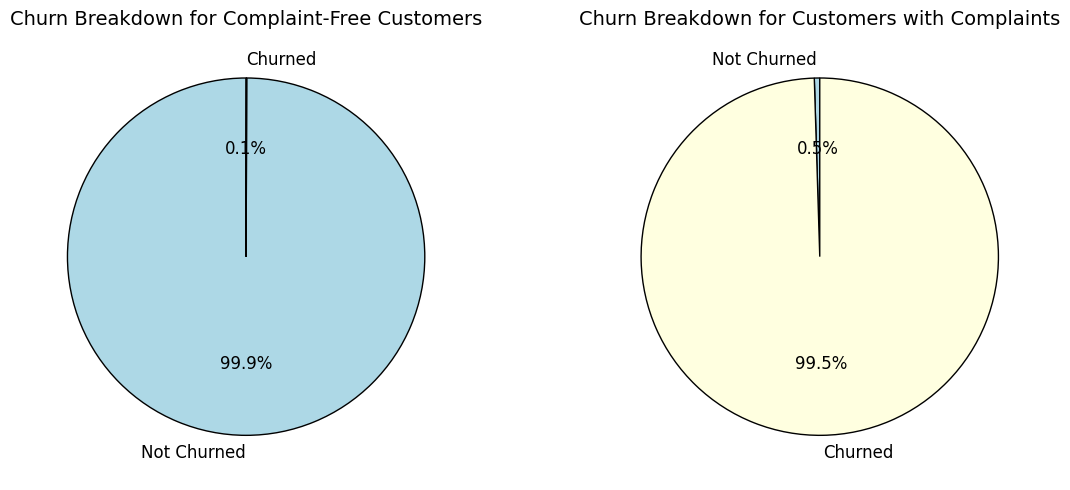

In [ ]:
nocomplaint_churn_counts = df[df["Complain"] == 0]["Exited"].value_counts().sort_index()
complaint_churn_counts = df[df["Complain"] == 1]["Exited"].value_counts().sort_index()

labels = ["Not Churned", "Churned"]
colors = ["lightblue", "lightyellow"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Pie chart 1: Churn breakdown for Active Members
wedges1, texts1, autotexts1 = axes[0].pie(
    nocomplaint_churn_counts, labels=labels, autopct="%1.1f%%", colors=colors,
    startangle=90, wedgeprops={"edgecolor": "black"}, textprops={"fontsize": 12}
)
axes[0].set_title("Churn Breakdown for Complaint-Free Customers", fontsize=14)

# Pie chart 2: Churn breakdown for Inactive Members
wedges2, texts2, autotexts2 = axes[1].pie(
    complaint_churn_counts, labels=labels, autopct="%1.1f%%", colors=colors,
    startangle=90, wedgeprops={"edgecolor": "black"}, textprops={"fontsize": 12}
)
axes[1].set_title("Churn Breakdown for Customers with Complaints", fontsize=14)

plt.tight_layout()
plt.show()


1️⃣ **Extremely High Churn for Complaining Customers**: Customers who have filed complaints exhibit an overwhelmingly high churn rate of **99.5%**, indicating dissatisfaction as a strong predictor of attrition.  

2️⃣ **Near-Zero Churn for Complaint-Free Customers**: Among customers who have never lodged a complaint, the churn rate is **only 0.1%**, suggesting that maintaining a positive experience effectively retains customers.  

→ Whenever a customer fills a complaint, they are highly likely to leave.

→ **Understanding the root causes** behind customer complaints is essential for improving their experience. Additionally, **enhancing the complaint-handling process** to provide better support at the right time can help prevent excessive churn after complaints are made.

    d. Satisfaction Score

In [ ]:
print(df['Satisfaction Score'].value_counts())

Satisfaction Score
3    2042
2    2014
4    2008
5    2004
1    1932
Name: count, dtype: int64


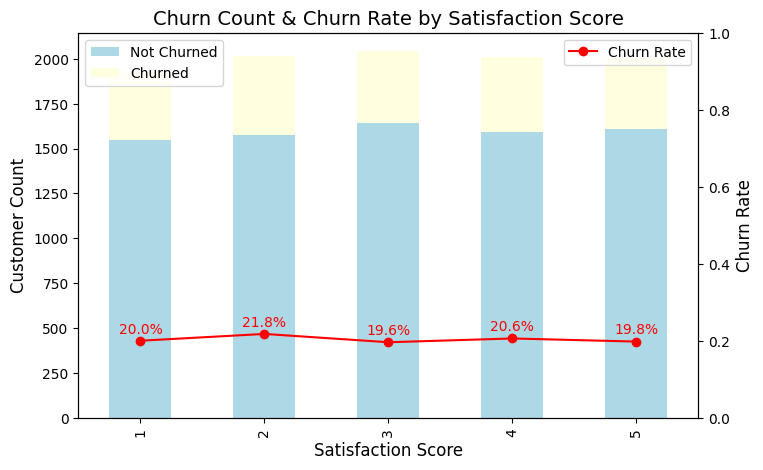

In [ ]:
score_counts = df.groupby(["Satisfaction Score", "Exited"])["CustomerId"].count().unstack()
churn_rate = score_counts[1] / (score_counts[0] + score_counts[1])
fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar chart for customer count by Card Type
score_counts.plot(kind="bar", stacked=True, color=["lightblue", "lightyellow"], ax=ax1)
ax1.set_ylabel("Customer Count", fontsize=12)
ax1.set_xlabel("Satisfaction Score", fontsize=12)
ax1.set_title("Churn Count & Churn Rate by Satisfaction Score", fontsize=14)

# Line chart for churn rate
ax2 = ax1.twinx()
ax2.plot(churn_rate.index-1, churn_rate, marker="o", linestyle="-", color="red", label="Churn Rate")
ax2.set_ylabel("Churn Rate", fontsize=12)
ax2.set_ylim(0, 1)

for i, rate in enumerate(churn_rate):
    ax2.text(churn_rate.index[i]-1, rate + 0.02, f"{rate:.1%}", ha="center", color="red", fontsize=10)

ax1.legend(["Not Churned", "Churned"], loc="upper left")
ax2.legend(loc="upper right")

plt.show()

The churn rate ranges from 19.6% to 21.8% across all five groups (scores 1 to 5), indicating that satisfaction score has little to **no impact on customer churn**.

    e. Earned Points

<Axes: >

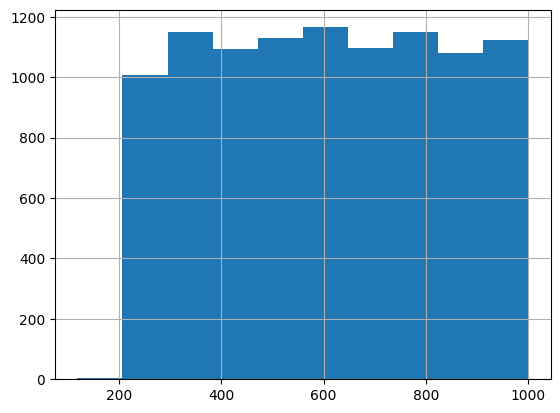

In [17]:
df['Point Earned'].hist()

/tmp/ipython-input-2298592602.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby('point_group')['Exited'].mean().sort_index() * 100


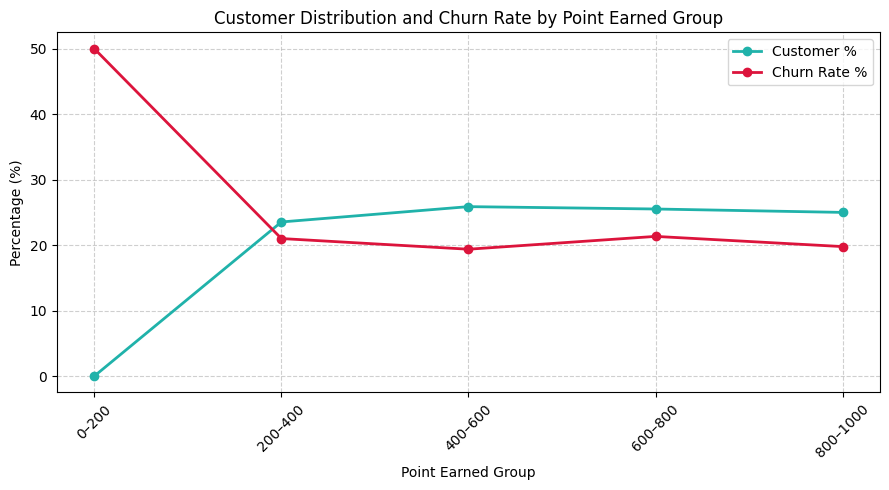

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

bins = [0, 200, 400, 600, 800, 1000]
labels = ['0–200', '200–400', '400–600', '600–800', '800–1000']
df['point_group'] = pd.cut(df['Point Earned'], bins=bins, labels=labels, right=True)

customer_pct = df['point_group'].value_counts(normalize=True).sort_index() * 100

churn_rate = df.groupby('point_group')['Exited'].mean().sort_index() * 100

plt.figure(figsize=(9, 5))
plt.plot(customer_pct.index, customer_pct.values, marker='o', linewidth=2, label='Customer %', color='lightseagreen')
plt.plot(churn_rate.index, churn_rate.values, marker='o', linewidth=2, label='Churn Rate %', color='crimson')

plt.title('Customer Distribution and Churn Rate by Point Earned Group')
plt.xlabel('Point Earned Group')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


**Points Earned has no significant impact on churn**: Churn rates between groups are likely similar.
No strong correlation between points earned and churn behavior.

➡️ Points alone are **not a key driver of churn**.

**III. Deep Analysis**

Through the EDA, we identified **two** key observations: **the churn rate in Germany is significantly higher** compared to the other two countries. We will conduct a deeper analysis of this issue.


As shown in the earlier chart, the churn rate in Germany is 32.4%, nearly twice that of France and Spain (16.2% and 16.7%), despite Germany accounting for only 25% of the total customers.

1. Demographics

As shown in Demographics factors, churned customers in Germany include both males and females, with the majority being between the ages of 40 and 50.

2. Financial

In [23]:
df_german = df[df["Geography"] == "Germany"]

/tmp/ipython-input-1589094780.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_german['balance_group'] = pd.cut(df_german['Balance'], bins=bins, labels=labels)
/tmp/ipython-input-1589094780.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df_german.groupby('balance_group')['Exited'].mean().sort_index() * 100


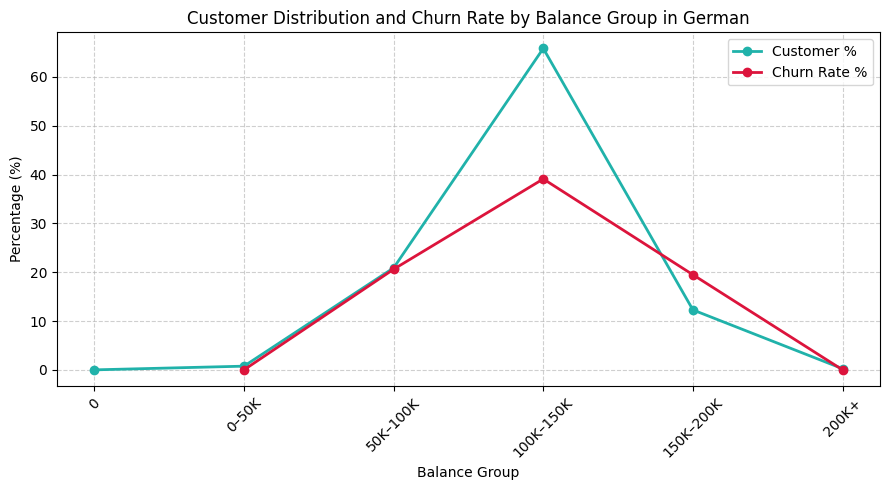

In [25]:
bins = [-1, 0, 50000, 100000, 150000, 200000, float('inf')]
labels = ['0', '0–50K', '50K–100K', '100K–150K', '150K–200K', '200K+']
df_german['balance_group'] = pd.cut(df_german['Balance'], bins=bins, labels=labels)

customer_pct = df_german['balance_group'].value_counts(normalize=True).sort_index() * 100

churn_rate = df_german.groupby('balance_group')['Exited'].mean().sort_index() * 100

plt.figure(figsize=(9, 5))
plt.plot(customer_pct.index, customer_pct.values, marker='o', linewidth=2, label='Customer %', color='lightseagreen')
plt.plot(churn_rate.index, churn_rate.values, marker='o', linewidth=2, label='Churn Rate %', color='crimson')

plt.title('Customer Distribution and Churn Rate by Balance Group in German')
plt.xlabel('Balance Group')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


**100K–150K emerges as both dominant and high-risk** → This segment represents the largest portion of customers (~65%), but also suffers from a churn rate near 40%, significantly higher than any other group. This is a critical concern, as losing customers in this dominant balance range could result in major portfolio instability. Immediate investigation is needed to understand what’s driving churn in this otherwise valuable segment.

➡️ This could indicate that a this specific customer segment is **more prone to churn**.

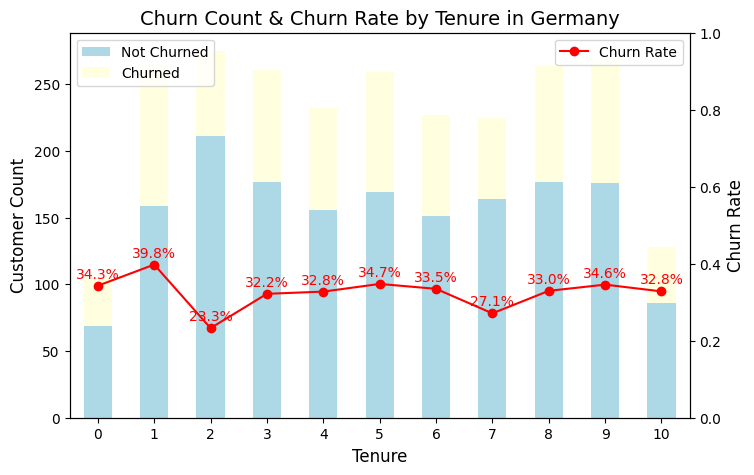

In [ ]:
tenure_counts = df_german.groupby(["Tenure", "Exited"])["CustomerId"].count().unstack()
churn_rate = tenure_counts[1] / (tenure_counts[0] + tenure_counts[1])
fig, ax1 = plt.subplots(figsize=(8, 5))

tenure_counts.plot(kind="bar", stacked=True, color=["lightblue", "lightyellow"], ax=ax1)
ax1.set_ylabel("Customer Count", fontsize=12)
ax1.set_xlabel("Tenure", fontsize=12)
ax1.set_title("Churn Count & Churn Rate by Tenure in Germany", fontsize=14)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

ax2 = ax1.twinx()
ax2.plot(churn_rate.index, churn_rate, marker="o", linestyle="-", color="red", label="Churn Rate")
ax2.set_ylabel("Churn Rate", fontsize=12)
ax2.set_ylim(0, 1)

for i, rate in enumerate(churn_rate):
    ax2.text(i, rate + 0.02, f"{rate:.1%}", ha="center", color="red", fontsize=10)

ax1.legend(["Not Churned", "Churned"], loc="upper left")
ax2.legend(loc="upper right")

plt.show()

**The churn rate by tenure in Germany follows a similar pattern to the overall trend** ➡️ They both receive a significant loss of new customers in their first and second years. Additionally, retention does not improve over time, as the churn rate for customers with 9 and 10 years of tenure remains just as high as that of newer customers, indicating a lack of long-term customer loyalty.

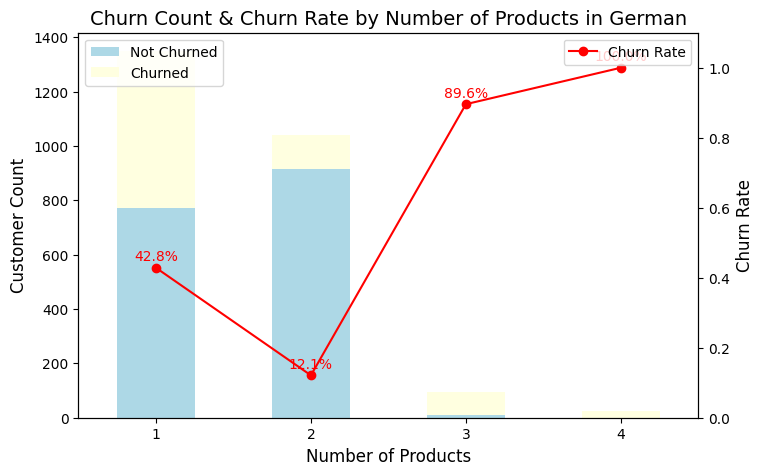

In [26]:
product_counts = df_german.groupby(["NumOfProducts", "Exited"])["CustomerId"].count().unstack().fillna(0)
churn_rate = product_counts[1] / (product_counts[0] + product_counts[1])
fig, ax1 = plt.subplots(figsize=(8, 5))

product_counts.plot(kind="bar", stacked=True, color=["lightblue", "lightyellow"], ax=ax1)
ax1.set_ylabel("Customer Count", fontsize=12)
ax1.set_xlabel("Number of Products", fontsize=12)
ax1.set_title("Churn Count & Churn Rate by Number of Products in German", fontsize=14)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

ax2 = ax1.twinx()
ax2.plot(churn_rate.index-1, churn_rate, marker="o", linestyle="-", color="red", label="Churn Rate")
ax2.set_ylabel("Churn Rate", fontsize=12)
ax2.set_ylim(0, 1.1)

for i, rate in enumerate(churn_rate):
    ax2.text(churn_rate.index[i]-1, rate + 0.02, f"{rate:.1%}", ha="center", color="red", fontsize=10)

ax1.legend(["Not Churned", "Churned"], loc="upper left")
ax2.legend(loc="upper right")

plt.show()

1️⃣ **This trend aligns with the overall pattern**: It shows that customers with multiple products tend to churn more frequently, suggesting that they may be exploring the bank’s offerings rather than fully engaging with them.   

2️⃣ **Single-product are more likely to leave**: With **42.8% churn rate among single-product customers**, it is significantly higher than the **27.7% rate for the overall bank**. Given that this group represents the **largest share of the German market**, their high churn rate is a major driver of overall attrition in Germany. To mitigate this, a deeper analysis is required to understand which specific products or services they are using and identify ways to improve their experience and long-term engagement.  

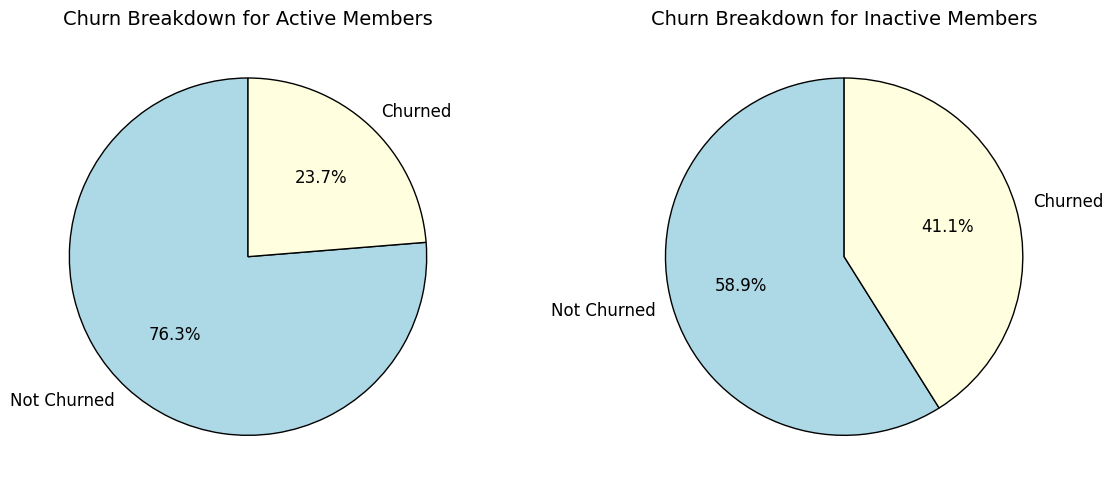

In [ ]:
active_churn_counts = df_german[df_german["IsActiveMember"] == 1]["Exited"].value_counts().sort_index()
inactive_churn_counts = df_german[df_german["IsActiveMember"] == 0]["Exited"].value_counts().sort_index()

labels = ["Not Churned", "Churned"]
colors = ["lightblue", "lightyellow"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Pie chart 1: Churn breakdown for Active Members
wedges1, texts1, autotexts1 = axes[0].pie(
    active_churn_counts, labels=labels, autopct="%1.1f%%", colors=colors,
    startangle=90, wedgeprops={"edgecolor": "black"}, textprops={"fontsize": 12}
)
axes[0].set_title("Churn Breakdown for Active Members", fontsize=14)

# Pie chart 2: Churn breakdown for Inactive Members
wedges2, texts2, autotexts2 = axes[1].pie(
    inactive_churn_counts, labels=labels, autopct="%1.1f%%", colors=colors,
    startangle=90, wedgeprops={"edgecolor": "black"}, textprops={"fontsize": 12}
)
axes[1].set_title("Churn Breakdown for Inactive Members", fontsize=14)

plt.tight_layout()
plt.show()


With a 41.1% churn rate among inactive customers, **inactivity can be seen as a key warning sign** that a customer is likely to leave. This insight can be leveraged to implement targeted retention strategies, such as personalized reminders or special event invitations, to re-engage inactive customers and encourage them to stay.

3. Conclusion


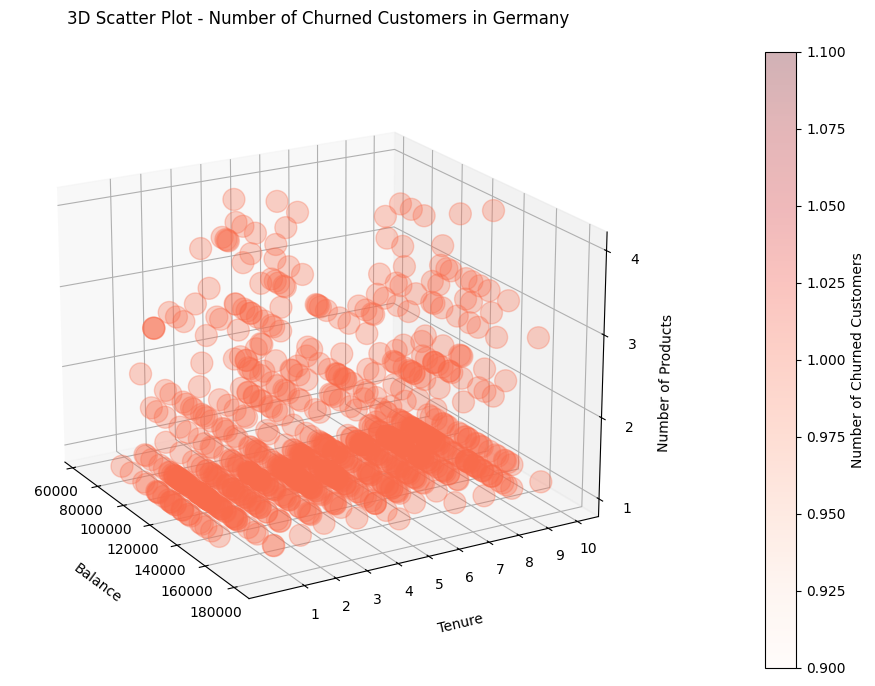

In [ ]:
df_churned = df_german[df_german["Exited"] == 1].copy()
df_churned["Churn_Count"] = 1

density_counts = df_churned.groupby(["Balance", "Tenure", "NumOfProducts"])["Churn_Count"].sum().reset_index()

density_dict = {(row["Balance"], row["Tenure"], row["NumOfProducts"]): row["Churn_Count"]
                for _, row in density_counts.iterrows()}

df_churned["Density"] = df_churned.apply(lambda row: density_dict.get((row["Balance"], row["Tenure"], row["NumOfProducts"]), 0), axis=1)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(df_churned["Balance"], df_churned["Tenure"], df_churned["NumOfProducts"],
                c=df_churned["Density"], cmap="Reds", alpha=0.3, s=250)

cbar = fig.colorbar(sc, ax=ax, label="Number of Churned Customers", pad=0.15)

ax.set_xlabel("Balance", labelpad=15)
ax.set_ylabel("Tenure ", labelpad=15)
ax.set_zlabel("Number of Products", labelpad=5)

ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_zticks([1, 2, 3, 4])

ax.view_init(elev=20, azim=-30)

ax.set_title("3D Scatter Plot - Number of Churned Customers in Germany", pad=20)

plt.show()

- Churned customers in the German market include both males and females, with the majority falling between the **ages of 40 and 50**.

- **Mid-balance customers exhibit a high churn rate**, indicating that having a moderate balance does not necessarily lead to stronger retention.

- **Churned customers are spread across all tenure levels**, suggesting that the bank has not effectively built customer loyalty over time.

- **Single-product customers have a particularly high churn rate**, highlighting the need for a deeper analysis of the specific products and services they use. Understanding their needs will be crucial for improving offerings and reducing churn.

- **Inactivity is a strong signal** that a customer is likely to leave. This presents an opportunity for targeted campaigns and special events to re-engage inactive customers and encourage them to stay.








**IV. Conclusion and Recommendation**

1. Churn Customer Charateristic

- Predominantly female customers

- Typically middle-aged (between 40 and 70)

- Likely to have mid - higher balance

- Use more than 2 products

- Tend to be less engaged or inactive in using banking services

- More likely to have submitted complaints

2. Conclusion

The overall **churn rate** stands at **20.4%**, with churned customers present in both **male and female segments**, though the rate is slightly higher among **females**, particularly within the **35-55 age group**.  

Among different markets, **Germany exhibits a significantly higher churn rate**, while **France and Spain** maintain a more stable customer base with lower attrition. In Germany, churn is particularly common among **single-product customers, mid-balance customers (100,000 - 150,000), and inactive customers**, indicating that **inactivity can be a strong predictor of churn**.  

A key concern is the **inability to retain new customers**, as those with **1-2 years of tenure** show the highest churn rate. Additionally, **customer loyalty does not appear to develop over time**, since **long-term customers (8-10 years tenure) still churn at a similar rate to newer ones**.  

Regarding product engagement, **two-product customers are the most stable segment, with the lowest churn rate at 7.6%**, whereas **single-product customers face a significantly higher churn rate (27.7%)**. This suggests an underlying issue within this group that requires further analysis to determine **which products they are using and whether these offerings need improvement**.  

Furthermore, **customer complaints serve as a near-certain indicator of churn**, with **99% of customers who file complaints eventually leaving**. This reinforces the need for proactive customer service strategies to address concerns before they escalate into churn.

2. Recommendation

1️⃣ **Enhancing Retention for New Customers**

- Develop onboarding programs to educate new customers about the bank’s services and benefits.
- Implement personalized engagement campaigns in the first 1-2 years, such as exclusive offers or proactive customer support, to strengthen relationships early.

2️⃣ **Improving Loyalty Among Long-Term Customers**

- Since tenure does not correlate with higher retention, the bank should introduce loyalty programs, incentives, or premium services for long-standing customers.
- Conduct customer experience surveys to identify what long-term customers value and where the bank is falling short.

3️⃣ **Addressing the High Churn Rate in Single-Product Customers**

- Perform a deeper analysis into which products have the highest churn rate and whether they lack competitive advantages.
- Consider cross-selling strategies to encourage single-product customers to explore additional services.
Improve product value through better benefits, enhanced usability, or targeted promotional offers.

4️⃣ **Mitigating Risk Among Mid-Balance Customers**

- Since mid-balance customers (100,000-150,000) are prone to churn, analyze their transaction behavior, service usage, and engagement levels to identify pain points.
- Offer personalized financial advice, investment options, or premium banking benefits to encourage long-term engagement.

5️⃣ **Leveraging Inactivity as a Churn Signal**

- Deploy early-warning systems to detect inactivity and trigger re-engagement campaigns, such as reminders, exclusive promotions, or invitations to special events.
- Provide automated follow-ups when customers show signs of disengagement.

6️⃣ **Addressing Customer Complaints Proactively**

- Since 99% of customers who file complaints eventually leave, it is crucial to enhance customer support responsiveness.
- Implement a structured complaint resolution system with faster response times and proactive follow-ups.
- Conduct sentiment analysis on complaints to uncover common themes and address recurring pain points.